## **군집화모델 알아보기-와인 클러스터링**

### <b> <font color=green> [데이터 준비하기]     
### [군집화모델 구현하기] </font> </b>     
1) 사용 라이브러리 파악하고 가져오기    
2) 모델 객체 생성하고 학습하기   
3) 모델 예측하기     
4) 군집 결과 시각화하기

## <font color=green> **[ 데이터 준비하기 ]**

### **Step 1 : 데이터 확인하기**
* 데이터 전처리에 사용되는 판다스 라이브러리를 가져와 pd 로 사용한다.

In [3]:
#코드작성
import pandas as pd

df = pd.read_csv("./data/wine.csv")

* data 폴더에 있는 'wine.csv'파일을 읽어 'df'에 저장한 후 내용을 출력한다.

In [4]:
#코드작성
df.head()

,alcohol,malic_acid,total_phenols,color_intensity,hue
0,14.23,1.71,2.80,5.64,1.04
1,13.20,1.78,2.65,4.38,1.05
2,13.16,2.36,2.80,5.68,1.03
3,14.37,1.95,3.85,7.80,0.86
4,13.24,2.59,2.80,4.32,1.04


* 데이터 정보를 파악한다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alcohol          178 non-null    float64
 1   malic_acid       178 non-null    float64
 2   total_phenols    178 non-null    float64
 3   color_intensity  178 non-null    float64
 4   hue              178 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


| 번호 | 이름 | 내용 |
|---------|------|------|
| 0 | alcohol | 알코올 |
| 1 | malic_acid  | 사과산 |
| 2 | total_phenols | 총 페놀 |
| 3 | color_intensity	  | 색 강도 |
| 4 | hue | 색상

### **step2. 데이터 준비하기**
- 특성 항목으로 'X'를 'alcohol'과 'malic_acid'으로 지정한다.

In [8]:
#코드작성
X = df[["alcohol", "malic_acid"]]

In [9]:
X.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


## <font color=green> **[기계학습 군집화 모델 구현]** </font>

### **step1. 라이브러리 가져오기**
- K-평균알고리즘 모델을 구현하기 위한 라이브러리를 가져온다. (scikit learn 라이브러리의 K평균 알고리즘 Kmeans 분류기 사용)

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### **Step 2 : 모델 객체 생성하기**
- KMeans( ) 모델 객체 model_km의 군집 개수를 3으로 하여 생성한다.

In [18]:
model_km = KMeans(n_clusters=3, random_state=42)       #코드작성

### **Step 3 : 모델 예측하기**  

#### 1) K-평균 알고리즘 모델 학습하고 결과 확인하기

In [20]:
#코드작성
model_km.fit(X)

C:\Users\IOT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\IOT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

- model_km.cluster_centers_에 저장된 각 군집의 중심점을 확인한다.

In [22]:
dir(model_km)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 '_validate_params',
 '_warn_mkl_vcomp',
 'algorithm',
 'cluster_

In [21]:
#코드작성
model_km.cluster_centers_

array([[12.21349206,  1.6531746 ],
       [13.0632    ,  3.8948    ],
       [13.71538462,  1.79969231]])

- 학습 후 군집화 결과가 저장된 model_km.labels_에 각 데이터별 군집 번호 0, 1, 2이 저장된 것을 확인한다.

In [25]:
#코드작성
model_km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1])

- 각 군집별 데이터 수를 확인한다.

In [30]:
#코드작성
pd.Series(model_km.labels_).value_counts()

2    65
0    63
1    50
dtype: int64

#### 2) 군집 결과 그래프로 시각화하기

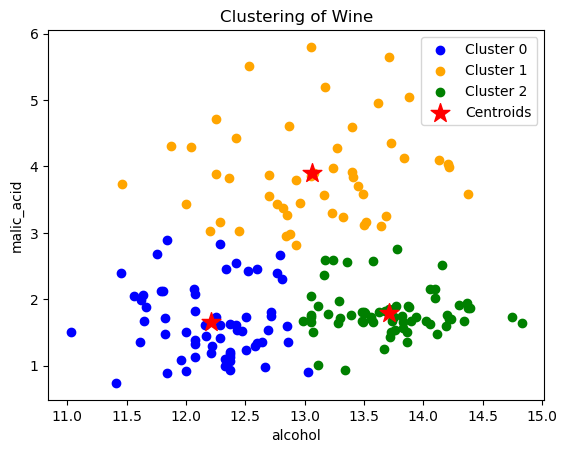

In [31]:
plt.figure()

plt.title('Clustering of Wine')
plt.xlabel(X.columns[0])   # alcohol
plt.ylabel(X.columns[1])   # malic_acid

plt.scatter ( X.iloc[model_km.labels_== 0,0],
    X.iloc[model_km.labels_ == 0,1], c='blue',   label='Cluster 0')
plt.scatter ( X.iloc[model_km.labels_ == 1,0],
    X.iloc[model_km.labels_ == 1,1], c='orange', label='Cluster 1')
plt.scatter ( X.iloc[model_km.labels_ == 2,0],
    X.iloc[model_km.labels_ == 2,1], c='green',  label='Cluster 2')

plt.scatter(model_km.cluster_centers_[:, 0],
            model_km.cluster_centers_[:, 1],
            c='red', marker='*', s=200, label ='Centroids' )

plt.legend()
plt.show()

### **Step 4 : 모델 예측하기**
- 학습된 모델을 사용하여 임의의 테스트 데이터의 군집 번호를 확인한다. (예, alcohol
= 14, malic_acid = 4）


In [34]:
print ( #코드작성 (
        pd.DataFrame( {'alcohol':[14], 'malic_acid' : [4]} ))

   alcohol  malic_acid
0       14           4


- 앞에서 그린 그래프에 테스트 데이터를 표시하고 해당 군집에 속하는지 확인한다.

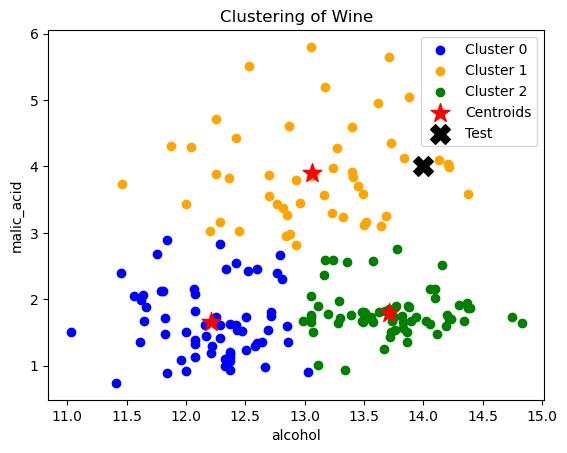

In [35]:
plt.figure()

plt.title('Clustering of Wine')
plt.xlabel(X.columns[0])   # alcohol
plt.ylabel(X.columns[1])   # malic_acid

plt.scatter ( X.iloc[model_km.labels_== 0,0],
    X.iloc[model_km.labels_ == 0,1], c='blue',   label='Cluster 0')
plt.scatter ( X.iloc[model_km.labels_ == 1,0],
    X.iloc[model_km.labels_ == 1,1], c='orange', label='Cluster 1')
plt.scatter ( X.iloc[model_km.labels_ == 2,0],
    X.iloc[model_km.labels_ == 2,1], c='green',  label='Cluster 2')

plt.scatter(model_km.cluster_centers_[:, 0],
            model_km.cluster_centers_[:, 1],
            c='red', marker='*', s=200, label ='Centroids' )

plt.scatter(14, 4, c='black', marker='X', s=200, label='Test' )

plt.legend()
plt.show()